# Least squares

A mathematical procedure for finding the best-fitting curve to a given set of points by minimizing the sum of the squares of the offsets ("the residuals") of the points from the curve. The sum of the squares of the offsets is used instead of the offset absolute values because this allows the residuals to be treated as a continuous differentiable quantity. However, because squares of the offsets are used, outlying points can have a disproportionate effect on the fit, a property which may or may not be desirable depending on the problem at hand. 


### Show the data


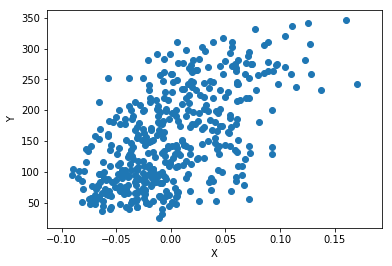

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets

# load data
d = datasets.load_diabetes()

X = d.data[:, 2]
Y = d.target

# draw original data
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


### Theory
For $N$ observation data:
$$
\mathbf{X} = \{x_1, x_2, ..., x_N \} \\
\mathbf{Y} = \{y_1, y_2, ..., y_N \}
$$

We want to find the model which can predict the data. The simplest model is linear model, which has the form of 
$$
y = ax + b
$$

The purpose is to find parameters $a, b$ which best fit the model to the observation data. 

We use the sum of squares to measure the differences (loss function) between the model's prediction and observation data:
$$
L = \sum_{i=1}^{N} (y_i - a x_i + b)^2
$$

To make the loss function minimize, we can find the parameters:
$$
\frac{\partial L}{\partial a} = -2 \sum_{i=1}^{N} (y_i - a x_i - b) x_i \\
\frac{\partial L}{\partial b} = -2 \sum_{i=1}^{N} (y_i - a x_i - b)
$$
When the loss is minimized, therefore the partial difference is zero, then we can get:
$$
-2 \sum_{i=1}^{N} (y_i - a x_i - b) x_i = 0 \\
-2 \sum_{i=1}^{N} (y_i - a x_i - b) = 0 \\
$$

We reoder the items as:
$$
a \sum x_i^2 + b \sum x_i = \sum y_i x_i \\
a \sum x_i + b N = \sum y_i
$$
By solving the linear equation we can obtain the model parameters.

### Program

a = 949.435260, b = 152.133484


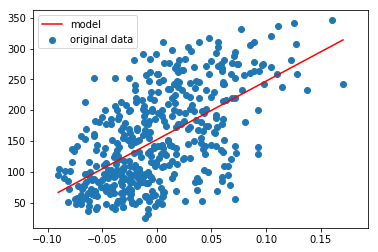

In [3]:
N = X.shape[0]

S_X2 = np.sum(X*X)
S_X  = np.sum(X)
S_XY = np.sum(X*Y)
S_Y  = np.sum(Y)

A1 = np.array([[S_X2, S_X], 
               [S_X, N]])
B1 = np.array([S_XY, S_Y])

coeff = np.linalg.inv(A1).dot(B1)

print('a = %f, b = %f' % (coeff[0], coeff[1]))

x_min = np.min(X)
x_max = np.max(X)
y_min = coeff[0] * x_min + coeff[1]
y_max = coeff[0] * x_max + coeff[1]

plt.scatter(X, Y, label='original data')
plt.plot([x_min, x_max], [y_min, y_max], 'r', label='model')
plt.legend()
plt.show()

## 如何使用迭代的方法求出模型参数

当数据比较多的时候，或者模型比较复杂，无法直接使用解析的方式求出模型参数。因此更为常用的方式是，通过迭代的方式逐步逼近模型的参数。

### 梯度下降法
在机器学习算法中，对于很多监督学习模型，需要对原始的模型构建损失函数，接下来便是通过优化算法对损失函数进行优化，以便寻找到最优的参数。在求解机器学习参数的优化算法中，使用较多的是基于梯度下降的优化算法(Gradient Descent, GD)。

梯度下降法有很多优点，其中，在梯度下降法的求解过程中，只需求解损失函数的一阶导数，计算的代价比较小，这使得梯度下降法能在很多大规模数据集上得到应用。梯度下降法的含义是通过当前点的梯度方向寻找到新的迭代点。

梯度下降法的基本思想可以类比为一个下山的过程。假设这样一个场景：一个人被困在山上，需要从山上下来(i.e. 找到山的最低点，也就是山谷)。但此时山上的浓雾很大，导致可视度很低。因此，下山的路径就无法确定，他必须利用自己周围的信息去找到下山的路径。这个时候，他就可以利用梯度下降算法来帮助自己下山。具体来说就是，以他当前的所处的位置为基准，寻找这个位置最陡峭的地方，然后朝着山的高度下降的地方走，同理，如果我们的目标是上山，也就是爬到山顶，那么此时应该是朝着最陡峭的方向往上走。然后每走一段距离，都反复采用同一个方法，最后就能成功的抵达山谷。


我们同时可以假设这座山最陡峭的地方是无法通过肉眼立马观察出来的，而是需要一个复杂的工具来测量，同时，这个人此时正好拥有测量出最陡峭方向的能力。所以，此人每走一段距离，都需要一段时间来测量所在位置最陡峭的方向，这是比较耗时的。那么为了在太阳下山之前到达山底，就要尽可能的减少测量方向的次数。这是一个两难的选择，如果测量的频繁，可以保证下山的方向是绝对正确的，但又非常耗时，如果测量的过少，又有偏离轨道的风险。所以需要找到一个合适的测量方向的频率，来确保下山的方向不错误，同时又不至于耗时太多！


![gradient_descent](images/gradient_descent.png)

如上图所示，得到了局部最优解。x,y表示的是$\theta_0$和$\theta_1$，z方向表示的是花费函数，很明显出发点不同，最后到达的收敛点可能不一样。当然如果是碗状的，那么收敛点就应该是一样的。

对于某一个损失函数
$$
L = \sum_{i=1}^{N} (y_i - a x_i + b)^2
$$

我们更新的策略是：
$$
\theta^1 = \theta^0 - \alpha \triangledown L(\theta)
$$
其中$\theta$代表了模型中的参数，例如$a$, $b$

此公式的意义是：L是关于$\theta$的一个函数，我们当前所处的位置为$\theta_0$点，要从这个点走到L的最小值点，也就是山底。首先我们先确定前进的方向，也就是梯度的反向，然后走一段距离的步长，也就是$\alpha$，走完这个段步长，就到达了$\theta_1$这个点！

下面就这个公式的几个常见的疑问：

* **$\alpha$是什么含义？**
$\alpha$在梯度下降算法中被称作为学习率或者步长，意味着我们可以通过$\alpha$来控制每一步走的距离，以保证不要步子跨的太大扯着蛋，哈哈，其实就是不要走太快，错过了最低点。同时也要保证不要走的太慢，导致太阳下山了，还没有走到山下。所以$\alpha$的选择在梯度下降法中往往是很重要的！$\alpha$不能太大也不能太小，太小的话，可能导致迟迟走不到最低点，太大的话，会导致错过最低点！
![gd_stepsize](images/gd_stepsize.png)

* **为什么要梯度要乘以一个负号？**
梯度前加一个负号，就意味着朝着梯度相反的方向前进！我们在前文提到，梯度的方向实际就是函数在此点上升最快的方向！而我们需要朝着下降最快的方向走，自然就是负的梯度的方向，所以此处需要加上负号



### Program

epoch    0: loss = 4303817.496892, a = 2.826518, b = 90.332322
epoch    1: loss = 2886806.756007, a = 4.689320, b = 127.204624
epoch    2: loss = 2650260.562182, a = 6.564882, b = 142.423411
epoch    3: loss = 2610244.478756, a = 8.443497, b = 148.704446
epoch    4: loss = 2601826.873313, a = 10.321163, b = 151.296317
epoch    5: loss = 2598022.583256, a = 12.196235, b = 152.365440
epoch    6: loss = 2594693.583475, a = 14.068035, b = 152.806033
epoch    7: loss = 2591324.277053, a = 15.936290, b = 152.987193
epoch    8: loss = 2587904.879022, a = 17.800890, b = 153.061271
epoch    9: loss = 2584465.875668, a = 19.661796, b = 153.091151
epoch   10: loss = 2581025.689621, a = 21.518994, b = 153.102788
epoch   11: loss = 2577592.886376, a = 23.372484, b = 153.106897
epoch   12: loss = 2574171.135769, a = 25.222270, b = 153.107901
epoch   13: loss = 2570761.947715, a = 27.068358, b = 153.107623
epoch   14: loss = 2567365.917653, a = 28.910755, b = 153.106819
epoch   15: loss = 2563983.260

epoch  751: loss = 1764362.463568, a = 738.104139, b = 152.654121
epoch  752: loss = 1764184.761567, a = 738.524700, b = 152.653853
epoch  753: loss = 1764007.767659, a = 738.944420, b = 152.653585
epoch  754: loss = 1763831.479016, a = 739.363301, b = 152.653317
epoch  755: loss = 1763655.892826, a = 739.781344, b = 152.653050
epoch  756: loss = 1763481.006286, a = 740.198551, b = 152.652784
epoch  757: loss = 1763306.816603, a = 740.614924, b = 152.652518
epoch  758: loss = 1763133.320998, a = 741.030464, b = 152.652252
epoch  759: loss = 1762960.516702, a = 741.445174, b = 152.651987
epoch  760: loss = 1762788.400955, a = 741.859054, b = 152.651723
epoch  761: loss = 1762616.971010, a = 742.272106, b = 152.651459
epoch  762: loss = 1762446.224132, a = 742.684333, b = 152.651196
epoch  763: loss = 1762276.157595, a = 743.095735, b = 152.650933
epoch  764: loss = 1762106.768685, a = 743.506314, b = 152.650671
epoch  765: loss = 1761938.054697, a = 743.916073, b = 152.650409
epoch  766

epoch 1276: loss = 1725222.268760, a = 874.886735, b = 152.566759
epoch 1277: loss = 1725200.331014, a = 875.033776, b = 152.566665
epoch 1278: loss = 1725178.480257, a = 875.180523, b = 152.566571
epoch 1279: loss = 1725156.716143, a = 875.326977, b = 152.566478
epoch 1280: loss = 1725135.038326, a = 875.473137, b = 152.566384
epoch 1281: loss = 1725113.446463, a = 875.619006, b = 152.566291
epoch 1282: loss = 1725091.940212, a = 875.764583, b = 152.566198
epoch 1283: loss = 1725070.519232, a = 875.909868, b = 152.566105
epoch 1284: loss = 1725049.183184, a = 876.054864, b = 152.566013
epoch 1285: loss = 1725027.931730, a = 876.199569, b = 152.565920
epoch 1286: loss = 1725006.764533, a = 876.343985, b = 152.565828
epoch 1287: loss = 1724985.681258, a = 876.488112, b = 152.565736
epoch 1288: loss = 1724964.681570, a = 876.631951, b = 152.565644
epoch 1289: loss = 1724943.765137, a = 876.775502, b = 152.565552
epoch 1290: loss = 1724922.931629, a = 876.918766, b = 152.565461
epoch 1291

epoch 2043: loss = 1719935.342420, a = 932.580887, b = 152.529910
epoch 2044: loss = 1719934.268714, a = 932.612559, b = 152.529890
epoch 2045: loss = 1719933.199154, a = 932.644167, b = 152.529869
epoch 2046: loss = 1719932.133727, a = 932.675713, b = 152.529849
epoch 2047: loss = 1719931.072414, a = 932.707195, b = 152.529829
epoch 2048: loss = 1719930.015201, a = 932.738614, b = 152.529809
epoch 2049: loss = 1719928.962070, a = 932.769971, b = 152.529789
epoch 2050: loss = 1719927.913006, a = 932.801265, b = 152.529769
epoch 2051: loss = 1719926.867993, a = 932.832496, b = 152.529749
epoch 2052: loss = 1719925.827015, a = 932.863665, b = 152.529729
epoch 2053: loss = 1719924.790056, a = 932.894771, b = 152.529709
epoch 2054: loss = 1719923.757100, a = 932.925815, b = 152.529689
epoch 2055: loss = 1719922.728132, a = 932.956798, b = 152.529670
epoch 2056: loss = 1719921.703136, a = 932.987718, b = 152.529650
epoch 2057: loss = 1719920.682097, a = 933.018576, b = 152.529630
epoch 2058

epoch 2458: loss = 1719711.971892, a = 941.517856, b = 152.524202
epoch 2459: loss = 1719711.750502, a = 941.531657, b = 152.524193
epoch 2460: loss = 1719711.529935, a = 941.545430, b = 152.524184
epoch 2461: loss = 1719711.310188, a = 941.559176, b = 152.524175
epoch 2462: loss = 1719711.091257, a = 941.572894, b = 152.524167
epoch 2463: loss = 1719710.873139, a = 941.586585, b = 152.524158
epoch 2464: loss = 1719710.655831, a = 941.600249, b = 152.524149
epoch 2465: loss = 1719710.439329, a = 941.613885, b = 152.524140
epoch 2466: loss = 1719710.223632, a = 941.627494, b = 152.524132
epoch 2467: loss = 1719710.008735, a = 941.641075, b = 152.524123
epoch 2468: loss = 1719709.794636, a = 941.654630, b = 152.524114
epoch 2469: loss = 1719709.581332, a = 941.668157, b = 152.524106
epoch 2470: loss = 1719709.368819, a = 941.681658, b = 152.524097
epoch 2471: loss = 1719709.157094, a = 941.695131, b = 152.524089
epoch 2472: loss = 1719708.946155, a = 941.708578, b = 152.524080
epoch 2473

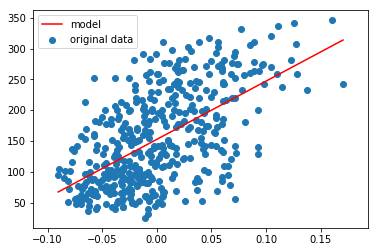

In [4]:
n_epoch = 3000          # epoch size
a, b = 1, 1             # initial parameters
epsilon = 0.001         # learning rate

for i in range(n_epoch):
    for j in range(N):
        a = a + epsilon*2*(Y[j] - a*X[j] - b)*X[j]
        b = b + epsilon*2*(Y[j] - a*X[j] - b)

    L = 0
    for j in range(N):
        L = L + (Y[j]-a*X[j]-b)**2
    print("epoch %4d: loss = %f, a = %f, b = %f" % (i, L, a, b))
    
x_min = np.min(X)
x_max = np.max(X)
y_min = a * x_min + b
y_max = a * x_max + b

plt.scatter(X, Y, label='original data')
plt.plot([x_min, x_max], [y_min, y_max], 'r', label='model')
plt.legend()
plt.show()

## How to show the iterative process

<IPython.core.display.Javascript object>


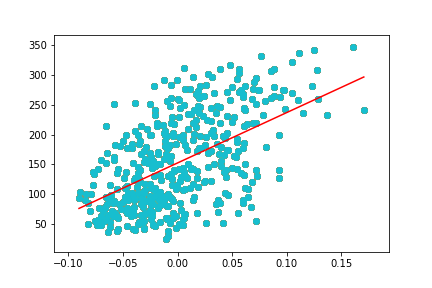

In [8]:
%matplotlib nbagg

import matplotlib.pyplot as plt
import matplotlib.animation as animation

n_epoch = 3000          # epoch size
a, b = 1, 1             # initial parameters
epsilon = 0.001         # learning rate

fig = plt.figure()
imgs = []

for i in range(n_epoch):
    for j in range(N):
        a = a + epsilon*2*(Y[j] - a*X[j] - b)*X[j]
        b = b + epsilon*2*(Y[j] - a*X[j] - b)

    L = 0
    for j in range(N):
        L = L + (Y[j]-a*X[j]-b)**2
    #print("epoch %4d: loss = %f, a = %f, b = %f" % (i, L, a, b))
    
    if i % 50 == 0:
        x_min = np.min(X)
        x_max = np.max(X)
        y_min = a * x_min + b
        y_max = a * x_max + b

        img = plt.scatter(X, Y, label='original data')
        img = plt.plot([x_min, x_max], [y_min, y_max], 'r', label='model')
        imgs.append(img)
        
ani = animation.ArtistAnimation(fig, imgs)
plt.show()

## How to use batch update method?

If some data is outliear, then only use one data can make the learning inaccuracy and slow.


* [梯度下降方法的几种形式](https://blog.csdn.net/u010402786/article/details/51188876)

## How to fit polynomial function?

If we observe a missle at some time, then how to estimate the trajectory? Acoording the physical theory, the trajectory can be formulated as:
$$
y = at^2 + bt + c
$$
The we need at least three data to compute the parameters $a, b, c$.



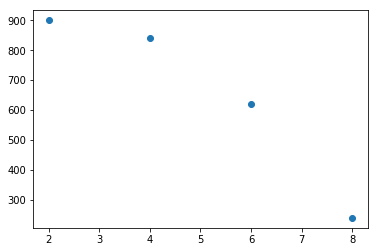

In [4]:
t = np.array([2, 4, 6, 8])
#t = np.linspace(0, 10)

pa = -20
pb = 90
pc = 800

y = pa*t**2 + pb*t + pc


plt.scatter(t, y)
plt.show()

## How to use sklearn to solve linear problem?



a = 949.435260, b = 152.133484


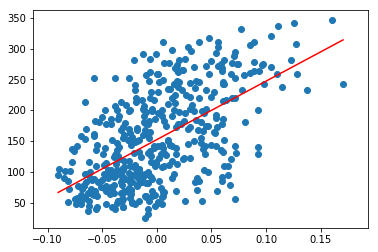

In [5]:
from sklearn import linear_model

# load data
d = datasets.load_diabetes()

X = d.data[:, np.newaxis, 2]
Y = d.target

# create regression model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

a, b = regr.coef_, regr.intercept_
print("a = %f, b = %f" % (a, b))

x_min = np.min(X)
x_max = np.max(X)
y_min = a * x_min + b
y_max = a * x_max + b

plt.scatter(X, Y)
plt.plot([x_min, x_max], [y_min, y_max], 'r')
plt.show()

## How to use sklearn to fit polynomial function?

In [6]:
# Fitting polynomial functions

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

t = np.array([2, 4, 6, 8])

pa = -20
pb = 90
pc = 800

y = pa*t**2 + pb*t + pc

model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
model = model.fit(t[:, np.newaxis], y)
model.named_steps['linear'].coef_


array([800.,  90., -20.])

## How to estimate some missing value by the model?


Y_est  =  [148.6844971  167.17376752 174.36403934 195.93485483 109.65159289
 120.95059148 245.23957594 204.15230835 269.89193649  75.75459712
 241.13084918 104.51568444 141.49422527 126.08649992 208.26103511
 233.94057735 151.76604217 158.956314   161.01067738 228.8046689
 220.58721538 129.16804499 100.40695768 117.86904641 168.2009492
 226.75030552 114.78750134 163.06504076 113.76031965 119.92340979
 157.92913231 237.02212242 120.95059148  98.3525943  123.00495485
 205.17949004  95.27104923 153.82040555 130.19522668  81.91768726
 171.28249427 137.38549851 137.38549851 189.77176469  82.94486895]
Y_test =  [198. 242. 232. 175.  93. 168. 275. 293. 281.  72. 140. 189. 181. 209.
 136. 261. 113. 131. 174. 257.  55.  84.  42. 146. 212. 233.  91. 111.
 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.  48. 178. 104.
 132. 220.  57.]
err = 8.437628 (56.601327), score = 0.422889
a = 953.024850, b = 152.544562


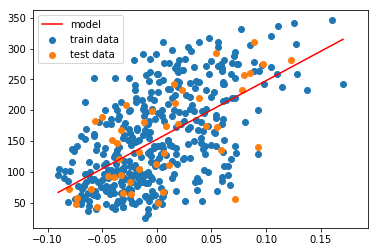

In [9]:
# load data
d = datasets.load_diabetes()

N = d.target.shape[0]
N_train = int(N*0.9)
N_test = N - N_train

X = d.data[:N_train, np.newaxis, 2]
Y = d.target[:N_train]

X_test = d.data[N_train:, np.newaxis, 2]
Y_test = d.target[N_train:]

# create regression model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

Y_est = regr.predict(X_test)
print("Y_est  = ", Y_est)
print("Y_test = ", Y_test)
err = (Y_est - Y_test)**2
err2 = sklearn.metrics.mean_squared_error(Y_test, Y_est)
score = regr.score(X_test, Y_test)
print("err = %f (%f), score = %f" % (np.sqrt(np.sum(err))/N_test, np.sqrt(err2), score))


# plot data
a, b = regr.coef_, regr.intercept_
print("a = %f, b = %f" % (a, b))

x_min = np.min(X)
x_max = np.max(X)
y_min = a * x_min + b
y_max = a * x_max + b


plt.scatter(X, Y, label='train data')
plt.scatter(X_test, Y_test, label='test data')
plt.plot([x_min, x_max], [y_min, y_max], 'r', label='model')
plt.legend()
plt.show()